In [50]:
import pandas as pd
import seaborn as sns 
from sklearn.datasets import load_iris

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

##【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation


X =

In [ ]:
data = load_iris()
#print(data)
x = pd.DataFrame(data = data.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])

#tailは後ろから
#headは前から
#headとtailを同時使用
#x.head(10).append(x.tail(10))

x.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pd.DataFrame(data = data.target, columns=["Species"])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


##【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [ ]:
df = pd.concat([x,y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


1.  先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
2.   ラベルごとのサンプル数の合計を出力する。
3.   特徴量に欠損値があるかを確認する。
4.   特徴量の平均値と標準偏差、四分位数を一度に表示させる。      


DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

1. 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()#xはfloat型、yはint型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


2. ラベルごとのサンプル数の合計を出力する。

In [ ]:
#列ごとに合計
df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

3. 特徴量に欠損値があるかを確認する。

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

4. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [ ]:
df.describe()
# xy.mean(numeric_only=True) 平均
# xy.std() 標準偏差
# xy.quantile(q=[0.25, 0.75]) 四分位数

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


1. sepal_widthの列を３つの異なる方法で抽出する
2. 50番目から99番目までのデータを抽出する
3. petal_lengthの列の50番目から99番目までのデータを抽出する
4. petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

1. sepal_widthの列を３つの異なる方法で抽出する

In [ ]:
#1
df["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [ ]:
#2
df.loc[:,"sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [ ]:
#3
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

2. 50番目から99番目までのデータを抽出する

In [ ]:
df.loc[50:99]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


3. petal_lengthの列の50番目から99番目までのデータを抽出する

In [ ]:
df.loc[50:99,"petal_length"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

4. petal_widthの値が0.2のデータを抽出する

In [ ]:
df.query("petal_width==0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


‣loc :列名で指定

‣iloc:番号で指定

loc : 名前で抽出したいとき

iloc: スライスで特定の範囲を抽出したい時

##【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


・ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する


箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


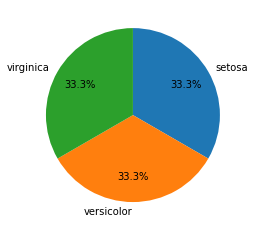

In [ ]:
#円グラフ
label=['setosa', 'versicolor', 'virginica']
s_value = df["Species"].value_counts()

plt.pie(s_value,labels=label,counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)

plt.show()

In [ ]:
# # 箱ひげ図
# label = [0, 1, 2]
# col = list(df.columns)
# # Species削除
# col.pop(-1)

# plt.figure(figsize=(14, 14))

# for i, column in enumerate(col):
#     for j in label:
#         # 1～12の数字作成
#         # print(len(label)*i, j+1)
#         plt.subplot(len(col), len(label), (len(label)*i)+(j+1)) # 4,3,1～12
#         # 条件抽出
#         plt.boxplot(df.query("Species == @j")[col[i]],
#                     labels = [col[i] + " : " + str(j)])
# plt.show()

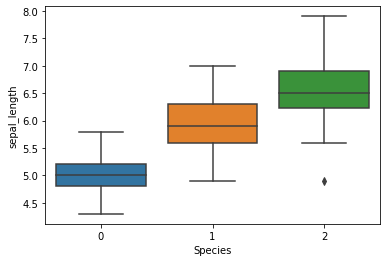

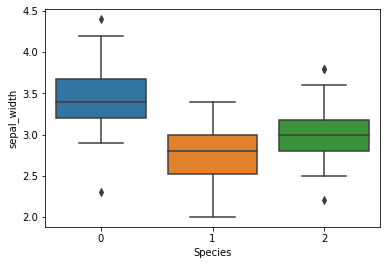

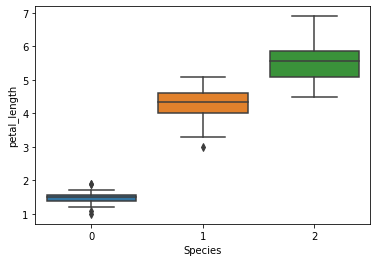

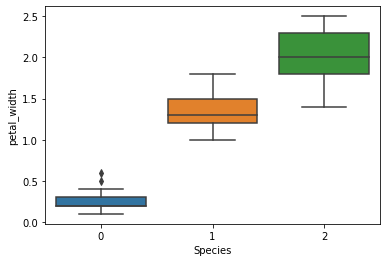

In [68]:

fig, ax1 = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)
fig, ax3 = plt.subplots(1, 1)
fig, ax4 = plt.subplots(1, 1)

#x=ラベル　y=特徴量
sns.boxplot(x="Species", y="sepal_length",data=df,ax=ax1)
sns.boxplot(x="Species", y="sepal_width",data=df,ax=ax2)
sns.boxplot(x="Species", y="petal_length",data=df,ax=ax3)
sns.boxplot(x="Species", y="petal_width",data=df,ax=ax4)


plt.show()

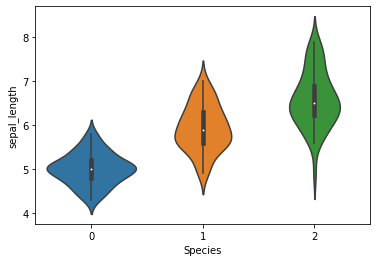

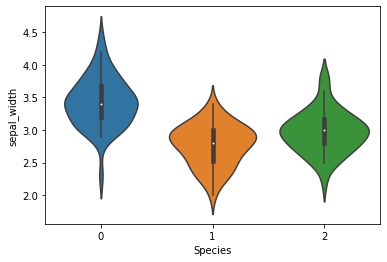

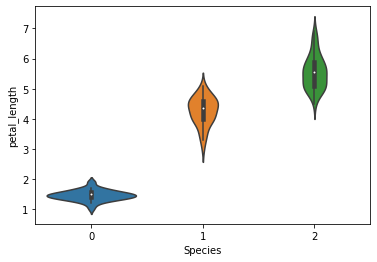

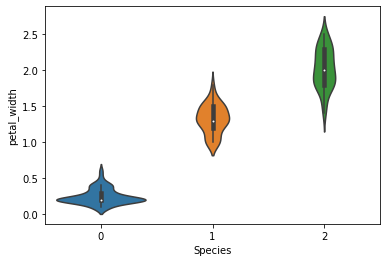

In [69]:
fig, ax1 = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)
fig, ax3 = plt.subplots(1, 1)
fig, ax4 = plt.subplots(1, 1)


sns.violinplot(x="Species", y="sepal_length",data=df,ax=ax1)
sns.violinplot(x="Species", y="sepal_width",data=df,ax=ax2)
sns.violinplot(x="Species", y="petal_length",data=df,ax=ax3)
sns.violinplot(x="Species", y="petal_width",data=df,ax=ax4)


plt.show()

In [ ]:
# #バイオリン図
# label = [0, 1, 2]
# col = list(df.columns)
# col.pop(-1)

# plt.figure(figsize=(16, 18))

# for i, column in enumerate(col):
#     for j in label:
#         plt.subplot(len(col), len(label), (len(label)*i)+(j+1))
#         plt.violinplot(df.query("Species == @j")[col[i]])
#         plt.xlabel(col[i] + " : " + str(j))

        
# plt.show()

箱ひげ図とバイオリン図の違い

箱ひげ図：平均/中央値と四分位範囲という要約統計量のみが含まれる

バイオリン図：すべての分布データが含まれる



1. 箱ひげの利点：データの分布を大雑把に把握できる。

1. 箱ひげの欠点：分布同士の比較が難しい

2. バイオリン図の利点：データのピークや大きさがわかりやすい

2. バイオリン図の欠点：知名度が低い

##【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


1. 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
1. 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
1. ４つの特徴量に関する相関係数行列を作る
1. 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

1. 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

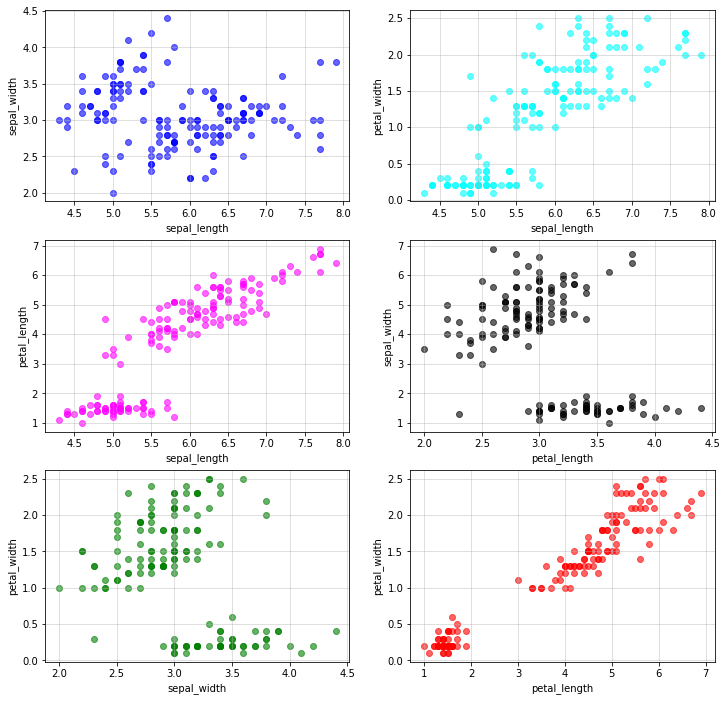

In [ ]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(321)#subplotの追加
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.scatter(df['sepal_length'], df['sepal_width'],color='blue',  alpha=0.6)
ax2.scatter(df['sepal_length'], df['petal_width'], color='cyan', alpha=0.6)
ax3.scatter(df['sepal_length'], df['petal_length'], color='magenta', alpha=0.6)
ax4.scatter(df['sepal_width'],  df['petal_length'], color='black', alpha=0.6)
ax5.scatter(df['sepal_width'],  df['petal_width'], color='green', alpha=0.6)
ax6.scatter(df['petal_length'], df['petal_width'], color='red', alpha=0.6)


ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')
ax2.set_xlabel('sepal_length')
ax2.set_ylabel('petal_width')
ax3.set_xlabel('sepal_length')
ax3.set_ylabel('petal_length')
ax4.set_xlabel('petal_length')
ax4.set_ylabel('sepal_width')
ax5.set_xlabel('sepal_width')
ax5.set_ylabel('petal_width')
ax6.set_xlabel('petal_length')
ax6.set_ylabel('petal_width')


ax1.grid(True, alpha=0.5)
ax2.grid(True, alpha=0.5)
ax3.grid(True, alpha=0.5)
ax4.grid(True, alpha=0.5)
ax5.grid(True, alpha=0.5)
ax6.grid(True, alpha=0.5)
plt.show()

2. 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

sepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）

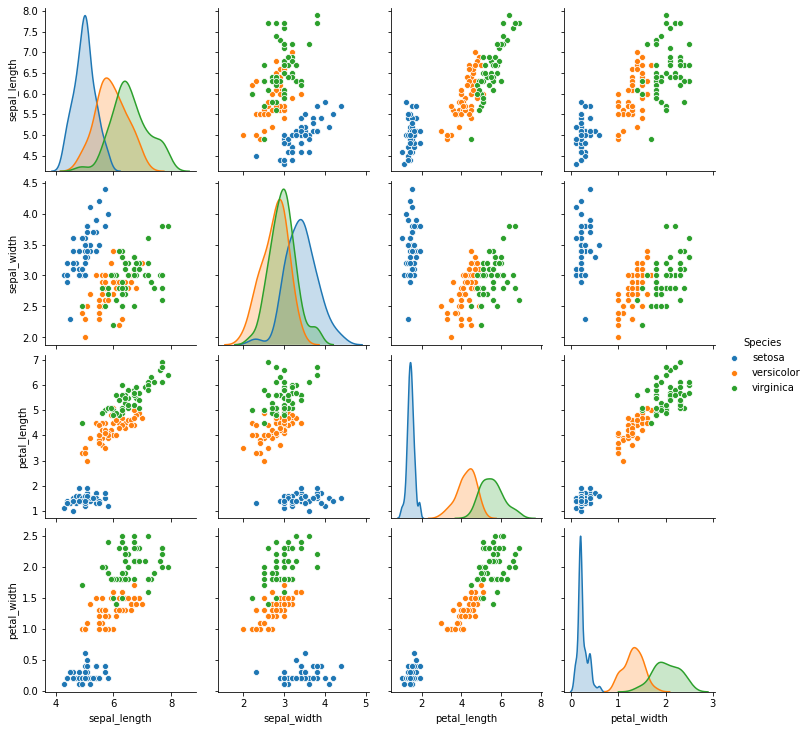

In [ ]:
df_cp = df.copy(deep=True)#コピー作成
iris = {0:"setosa", 1: "versicolor", 2: "virginica"}
df_cp["Species"] = df["Species"].map(iris)


sns.pairplot(df_cp, hue='Species')
plt.show()

3. ４つの特徴量に関する相関係数行列を作る

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


4. 相関係数行列のヒートマップを作る

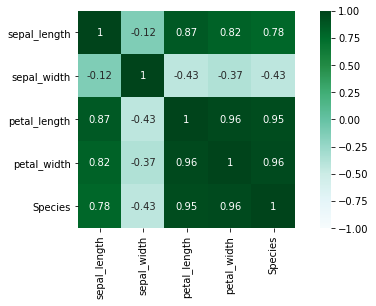

In [ ]:
plt.figure(figsize=(9, 4))  
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, square=True, cmap='BuGn')
plt.show()

##【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

散布図行列から

* 特徴量を選択して各ラベルごとに表示することで、アヤメの種類により特徴量に違いがわかりやすい。

* 今後データを分類する場合、特徴量を散布図行列にし判断するのが吉である。

* setosaはがく片の幅は広く、花弁の長さ・幅は小さいので他の二つより分類しやすい。

* versicolorとvirginicaはがく片の幅・長さのサイズが似ており花弁を特微量とし分類するのがよい。

花弁の長さ、花弁の幅の大小

setosa < versicolor < virginica の順位である







